## Baseline Models
    * Linear Regression
    * Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [3]:
from IPython.display import display
from sklearn.metrics import mutual_info_score

In [4]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head().T

(1460, 81)


,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [5]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head().T

(1459, 80)


,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622,14267,13830,9978,5005
...,...,...,...,...,...
MiscVal,0,12500,0,0,0
MoSold,6,6,3,6,1
YrSold,2010,2010,2010,2010,2010
SaleType,WD,WD,WD,WD,WD


In [6]:
base_num_cat = ['MSSubClass', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars',
       'OverallCond', 'FullBath', 'Fireplaces', 'HalfBath']

In [7]:
base_con=['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'BsmtFinSF1', 'YearBuilt', 'YearRemodAdd', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'MasVnrArea']

In [8]:
base_cat=['Neighborhood', 'Exterior2nd', 'Exterior1st', 'BsmtFinType1',
       'FireplaceQu', 'GarageFinish', 'BsmtQual', 'KitchenQual', 'GarageType',
       'BsmtExposure', 'Foundation', 'HeatingQC', 'ExterQual', 'MasVnrType',
       'SaleCondition', 'MSZoning', 'SaleType']

In [10]:
for col in base_cat:
    print('=============================================')
    print(col)
    print('length of unique : ',len(train[col].unique()))
    print(train[col].value_counts())

Neighborhood
length of unique :  25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Exterior2nd
length of unique :  16
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
Exterior1st
length of unique :  15
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlo

### Validation Framework

In [9]:
def Prepare_Validation_Framework(df):    
    np.random.seed(2) # setting random seed

    n = len(df) # number of rows

    n_val = int(0.2 * n) # validation set is 20% of the data
    n_test = int(0.2 * n) # test set is 20% of the data
    n_train = n - (n_val + n_test) # training set  is 60% of the data

    idx = np.arange(n) # indexes
    np.random.shuffle(idx) # shuffling the data 

    df_shuffled = df.iloc[idx] #shuffled data frame

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    return df_train,df_val,df_test

In [10]:
df_train , df_val, df_test = Prepare_Validation_Framework(df=train)

In [ ]:
%matplotlib inline

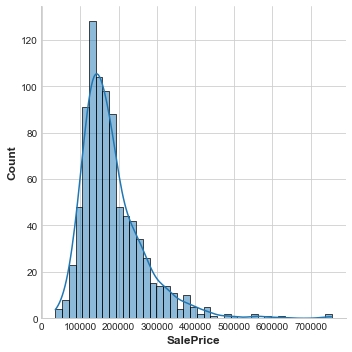

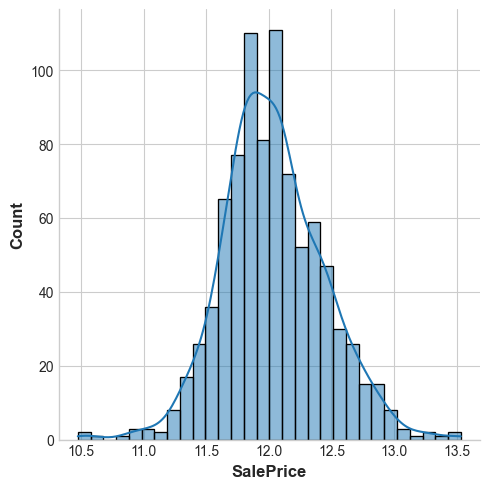

In [11]:
sns.displot(df_train.SalePrice,kde=True)
sns.displot(np.log1p(df_train.SalePrice),kde=True)

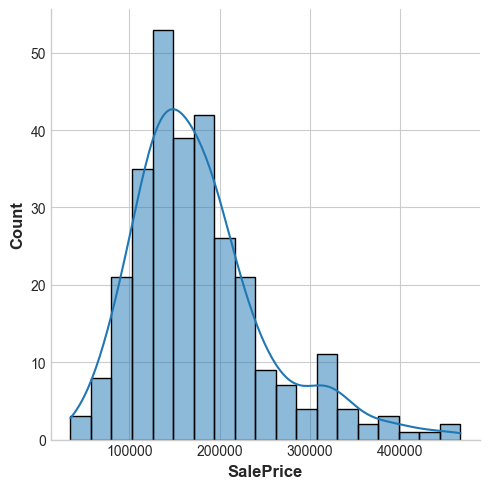

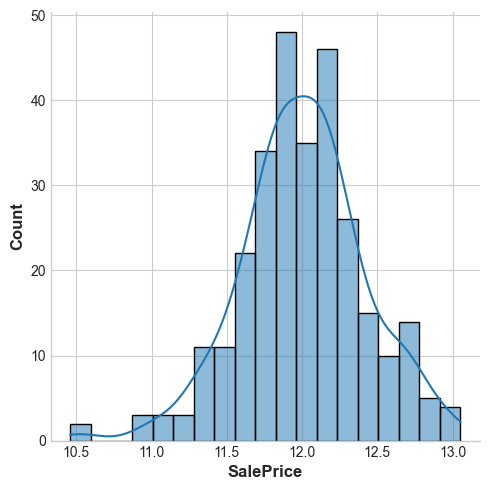

In [12]:
sns.displot(df_val.SalePrice,kde=True)
sns.displot(np.log1p(df_val.SalePrice),kde=True)

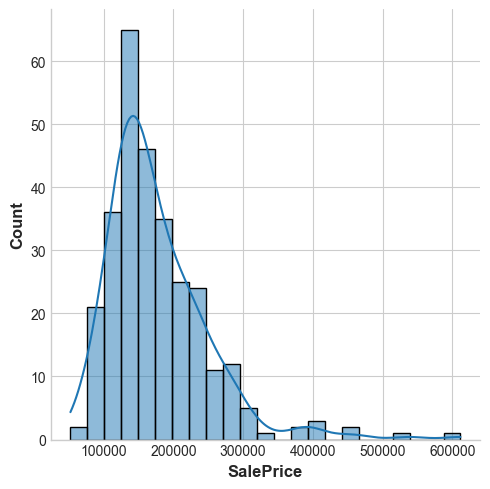

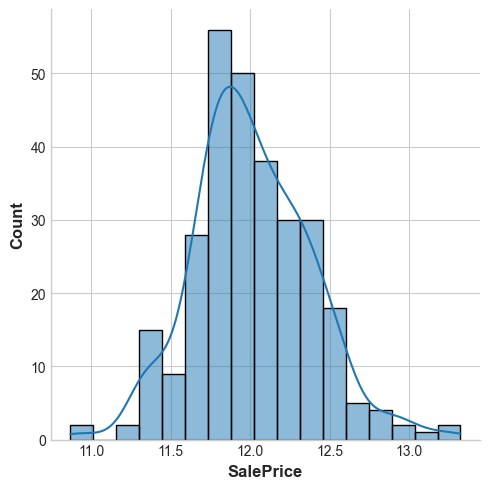

In [13]:
sns.displot(df_test.SalePrice,kde=True)
sns.displot(np.log1p(df_test.SalePrice),kde=True)

In [15]:
y_train_orig = df_train.SalePrice.values
y_val_orig = df_val.SalePrice.values
y_test_orig = df_test.SalePrice.values

y_train = np.log1p(df_train.SalePrice.values)
y_val = np.log1p(df_val.SalePrice.values)
y_test = np.log1p(df_test.SalePrice.values)

del df_train['SalePrice']
del df_val['SalePrice']
del df_test['SalePrice']

### Regularized Linear Regression

In [14]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
def prepare_X(df,base_num_cat,base_con,base_cat):
    df = df.copy()
    base_ = base_num_cat + base_con + base_cat
    features = base_.copy()
    df_base = df[features]
    # fill na's
    for col in base_num_cat:
        df_base[col].fillna(-1,inplace=True)
    for col in base_con:    
        df_base[col].fillna(-99,inplace=True)
    for col in base_cat:
        df_base[col].fillna('missing',inplace=True)
        
    return df_base[features]    

In [17]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [18]:
X_train = prepare_X(df_train,base_num_cat,base_con,base_cat=[])

<ipython-input-16-f6eb5d36e304>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-1,inplace=True)
<ipython-input-16-f6eb5d36e304>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-99,inplace=True)


In [19]:
X_val = prepare_X(df_val,base_num_cat,base_con,base_cat=[])

<ipython-input-16-f6eb5d36e304>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-1,inplace=True)
<ipython-input-16-f6eb5d36e304>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-99,inplace=True)


In [20]:
X_train

,MSSubClass,OverallQual,TotRmsAbvGrd,GarageCars,OverallCond,FullBath,Fireplaces,HalfBath,GrLivArea,1stFlrSF,TotalBsmtSF,GarageArea,BsmtFinSF1,YearBuilt,YearRemodAdd,OpenPorchSF,2ndFlrSF,WoodDeckSF,MasVnrArea
503,20,7,6,2,8,2,2,0,1801,1801,1501,484,1247,1959,1997,54,0,0,0.0
101,60,6,7,2,5,2,1,1,1732,977,741,476,0,1985,1985,46,755,192,336.0
608,70,8,10,2,6,2,2,1,3194,1940,965,380,428,1934,1998,0,1254,0,0.0
1089,120,8,4,2,5,1,1,1,1247,1247,1247,550,1039,2005,2005,84,0,0,0.0
819,120,7,6,2,5,2,1,0,1358,1358,1358,484,733,2009,2010,35,0,192,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,20,9,9,3,5,2,1,0,2234,2234,2216,1166,1904,2008,2009,60,0,0,748.0
176,60,6,8,2,5,2,1,1,2060,1164,1151,521,831,1988,1989,228,896,0,268.0
740,70,5,7,2,7,2,0,0,1432,768,264,360,0,1910,2002,0,664,270,0.0
507,20,6,4,2,5,2,0,0,1218,1218,1218,676,27,2009,2009,102,0,0,0.0


In [21]:
X_train.isnull().sum()

MSSubClass      0
OverallQual     0
TotRmsAbvGrd    0
GarageCars      0
OverallCond     0
FullBath        0
Fireplaces      0
HalfBath        0
GrLivArea       0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
BsmtFinSF1      0
YearBuilt       0
YearRemodAdd    0
OpenPorchSF     0
2ndFlrSF        0
WoodDeckSF      0
MasVnrArea      0
dtype: int64

#### without categorical

In [22]:
w_01, w1 = train_linear_regression_reg(X_train, y_train)
w_02, w2 = train_linear_regression_reg(X_train, y_train_orig)

In [23]:
y_pred1 = w_01 + X_train.dot(w1)#logged
y_pred2 = w_02 + X_train.dot(w2)#orig

In [24]:
y_pred_val1 = w_01 + X_val.dot(w1)#logged
y_pred_val2 = w_02 + X_val.dot(w2)#orig

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


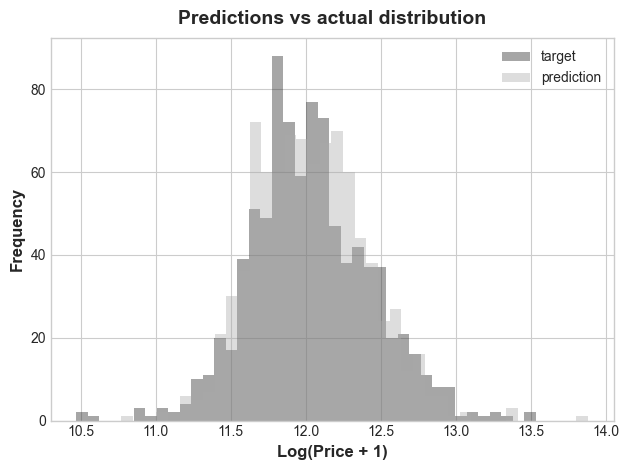

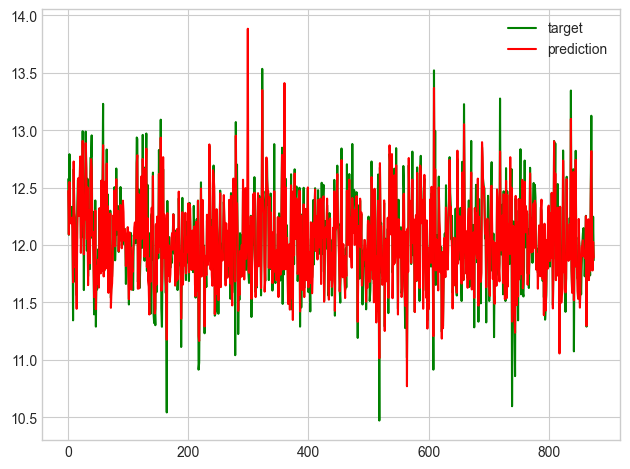

RMSE logged vs Logged


0.15784809074282374

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


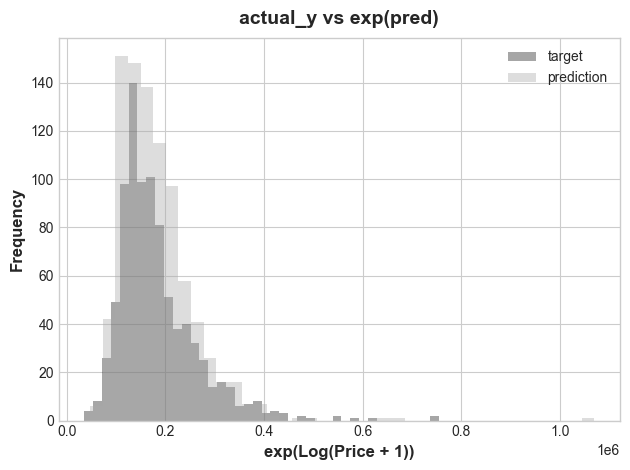

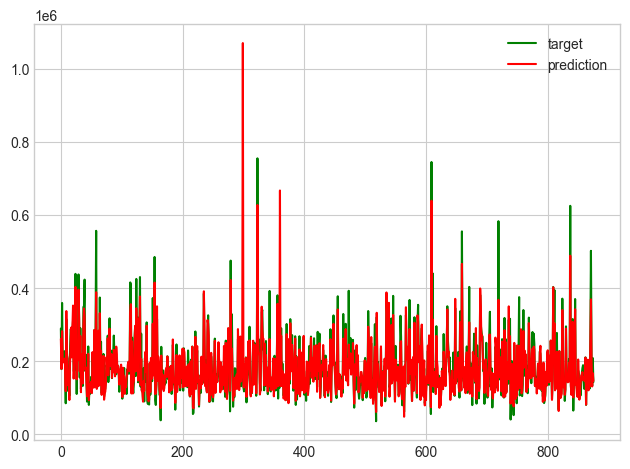

RMSE orig vs exp(Logged)


44715.639587162615

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


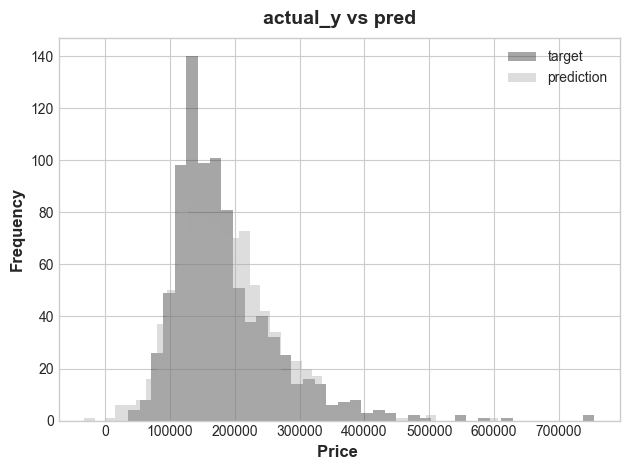

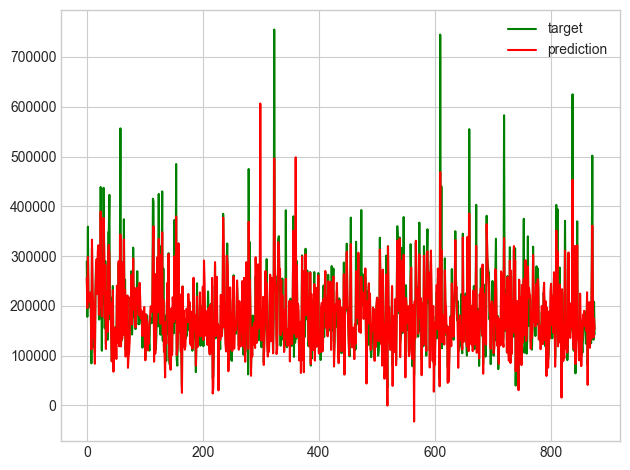

RMSE orig vs pred


38658.30751574595

In [25]:
sns.distplot(y_train, label='target', color='#222222', kde = False, bins=40)
sns.distplot(y_pred1, label='prediction', color='#aaaaaa',kde = False, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()
sns.lineplot(x=np.arange(len(y_train)),y=y_train, label='target',color='g')
sns.lineplot(x=np.arange(len(y_pred1)),y=y_pred1, label='prediction',color='r')
plt.legend()
plt.show()
print('RMSE logged vs Logged')
display(rmse(y_train, y_pred1))

sns.distplot(y_train_orig, label='target', color='#222222', kde = False, bins=40)
sns.distplot(np.exp(y_pred1), label='prediction', color='#aaaaaa',kde = False, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('exp(Log(Price + 1))')
plt.title('actual_y vs exp(pred)')
plt.show()
sns.lineplot(x=np.arange(len(y_train)),y=y_train_orig, label='target',color='g')
sns.lineplot(x=np.arange(len(y_pred1)),y=np.exp(y_pred1), label='prediction',color='r')
plt.legend()
plt.show()
print('RMSE orig vs exp(Logged)')
display(rmse(y_train_orig, np.exp(y_pred1)))

sns.distplot(y_train_orig, label='target', color='#222222', kde = False, bins=40)
sns.distplot(y_pred2, label='prediction', color='#aaaaaa',kde = False, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Price ')
plt.title('actual_y vs pred')
plt.show()
sns.lineplot(x=np.arange(len(y_train)),y=y_train_orig, label='target',color='g')
sns.lineplot(x=np.arange(len(y_pred1)),y=y_pred2, label='prediction',color='r')
plt.legend()
plt.show()
print('RMSE orig vs pred')
display(rmse(y_train_orig, y_pred2))

In [26]:
from sklearn.linear_model import Ridge,LinearRegression

#### with categorical

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
dicts=df_train[base_cat].iloc[:2].to_dict(orient='records')

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [31]:
dv.get_feature_names_out()

array(['BsmtExposure=No', 'BsmtFinType1=ALQ', 'BsmtFinType1=Unf',
       'BsmtQual=Gd', 'BsmtQual=TA', 'ExterQual=Gd', 'ExterQual=TA',
       'Exterior1st=BrkFace', 'Exterior1st=HdBoard',
       'Exterior2nd=HdBoard', 'Exterior2nd=Wd Sdng', 'FireplaceQu=TA',
       'Foundation=CBlock', 'GarageFinish=Fin', 'GarageType=Attchd',
       'HeatingQC=TA', 'KitchenQual=Gd', 'KitchenQual=TA', 'MSZoning=RL',
       'MasVnrType=BrkFace', 'MasVnrType=None', 'Neighborhood=Crawfor',
       'Neighborhood=SawyerW', 'SaleCondition=Normal', 'SaleType=WD'],
      dtype=object)

In [32]:
dv.transform(dicts)

array([[1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 1.]])

In [33]:
X_train = prepare_X(df_train,base_num_cat,base_con,base_cat)

<ipython-input-16-f6eb5d36e304>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-1,inplace=True)
<ipython-input-16-f6eb5d36e304>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-99,inplace=True)
<ipython-input-16-f6eb5d36e304>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna('missing',inplace=True)


In [87]:
X_val = prepare_X(df_val,base_num_cat,base_con,base_cat)

<ipython-input-16-f6eb5d36e304>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-1,inplace=True)
<ipython-input-16-f6eb5d36e304>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna(-99,inplace=True)
<ipython-input-16-f6eb5d36e304>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col].fillna('missing',inplace=True)


In [34]:
train_dicts = X_train.to_dict(orient='records')

In [35]:
val_dicts = X_val.to_dict(orient='records')

In [36]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [37]:
train_matrix= dv.transform(train_dicts)

In [38]:
train_matrix.shape

(876, 149)

In [39]:
val_matrix= dv.transform(val_dicts)

In [40]:
dv.get_feature_names_out().shape

(149,)

In [42]:
LR_model = LinearRegression(normalize=True)

In [ ]:
Ridge_model = Ridge()

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [43]:
LR_model.fit(train_matrix,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [44]:
y_pred1 = LR_model.predict(train_matrix)#logged
#y_pred2 = w_02 + X_train.dot(w2)#orig

In [45]:
rmse(y_train,y_pred1)

0.12233925878247909

In [46]:
rmse(y_train_orig,np.exp(y_pred1))

27814.288580838944

In [47]:
y_val_pred1 = LR_model.predict(val_matrix)#logged

In [48]:
y_val_pred1

array([2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
       2.51189901e+10, 2.51189901e+10, 2.51189901e+10, 2.51189901e+10,
      

In [ ]:
y

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

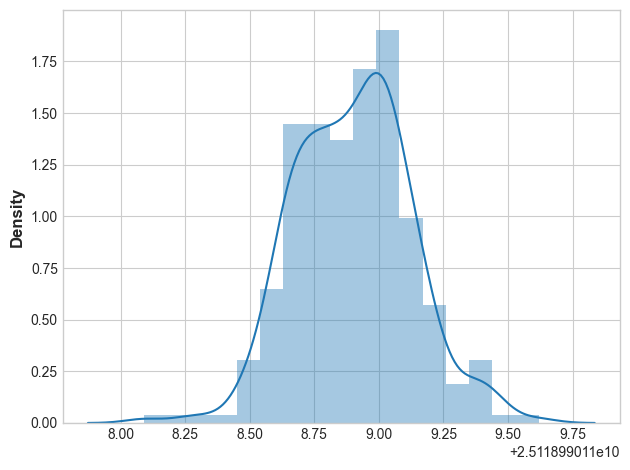

In [49]:
sns.distplot(y_val_pred1)

In [92]:
val_matrix.shape

(292, 149)

In [50]:
rmse(y_val_orig,np.exp(y_val_pred1))

<ipython-input-50-37281f669cb9>:1: RuntimeWarning: overflow encountered in exp
  rmse(y_val_orig,np.exp(y_val_pred1))


inf

### lets try Ridge

In [ ]:
# train_matrix

In [53]:
#y_train vs y_pred
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(train_matrix, y_train, r=r)
    y_pred = w_0 + train_matrix.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train, y_pred)}")

alpha=1e-06 : rmse = 0.12233917682051307
alpha=0.0001 : rmse = 0.12233920337393403
alpha=0.001 : rmse = 0.12234174623323638
alpha=0.01 : rmse = 0.12252217802225687
alpha=0.1 : rmse = 0.12512303453987392
alpha=1 : rmse = 0.1285599106455575
alpha=5 : rmse = 0.13189007357239757
alpha=10 : rmse = 0.13432244061014362


In [56]:
#y_train_orig vs np.exp
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(train_matrix, y_train, r=r)
    y_pred = w_0 + train_matrix.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train_orig, np.exp(y_pred))}")

alpha=1e-06 : rmse = 27814.823278318487
alpha=0.0001 : rmse = 27816.381614640304
alpha=0.001 : rmse = 27830.6581148234
alpha=0.01 : rmse = 27968.852649418826
alpha=0.1 : rmse = 28692.667408019304
alpha=1 : rmse = 29629.691024977445
alpha=5 : rmse = 30941.492980938136
alpha=10 : rmse = 32102.15667714576


In [58]:
#y_train_orig vs Y_train_orig
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(train_matrix, y_train_orig, r=r)
    y_pred = w_0 + train_matrix.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_train_orig, y_pred)}")

alpha=1e-06 : rmse = 29352.949333212284
alpha=0.0001 : rmse = 29352.949342263626
alpha=0.001 : rmse = 29352.95024469632
alpha=0.01 : rmse = 29353.03320695067
alpha=0.1 : rmse = 29358.752213462743
alpha=1 : rmse = 29507.799975618986
alpha=5 : rmse = 29995.083591340943
alpha=10 : rmse = 30446.335131068507


In [54]:
#y_val vs y_pred
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(train_matrix, y_train, r=r)
    y_pred = w_0 + val_matrix.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val, y_pred)}")

alpha=1e-06 : rmse = 14.18502593554318
alpha=0.0001 : rmse = 7.7508350582110195
alpha=0.001 : rmse = 7.653434396708379
alpha=0.01 : rmse = 6.488733440069004
alpha=0.1 : rmse = 2.6453845601734756
alpha=1 : rmse = 0.5199250067856259
alpha=5 : rmse = 0.2457647308301101
alpha=10 : rmse = 0.20734945497885093


In [55]:
#y_val_orig vs np.exp
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(train_matrix, y_train, r=r)
    y_pred = w_0 + val_matrix.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val_orig, np.exp(y_pred))}")

alpha=1e-06 : rmse = 192516.5044498229
alpha=0.0001 : rmse = 192444.03841288193
alpha=0.001 : rmse = 192436.55029840404
alpha=0.01 : rmse = 192258.22564257376
alpha=0.1 : rmse = 180135.04369055392
alpha=1 : rmse = 86377.48979718138
alpha=5 : rmse = 49940.46908522731
alpha=10 : rmse = 42733.20447909047


In [60]:
#Y_train_orig
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(train_matrix, y_train_orig, r=r)
    y_pred = w_0 + val_matrix.dot(w)
    print(f"alpha={r} : rmse = {rmse(y_val_orig, y_pred)}")

alpha=1e-06 : rmse = 575003.7480096928
alpha=0.0001 : rmse = 46981.71692374468
alpha=0.001 : rmse = 46990.99992845026
alpha=0.01 : rmse = 45069.68366250171
alpha=0.1 : rmse = 42512.67205458056
alpha=1 : rmse = 44414.336544244376
alpha=5 : rmse = 43623.65343401499
alpha=10 : rmse = 42581.35875999074


### Featuring Engr Next